In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("temps.csv")

df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [3]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [4]:
# One Hot Encoder Para o dado categorico Week
df = pd.get_dummies(df, prefix="week")

df.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


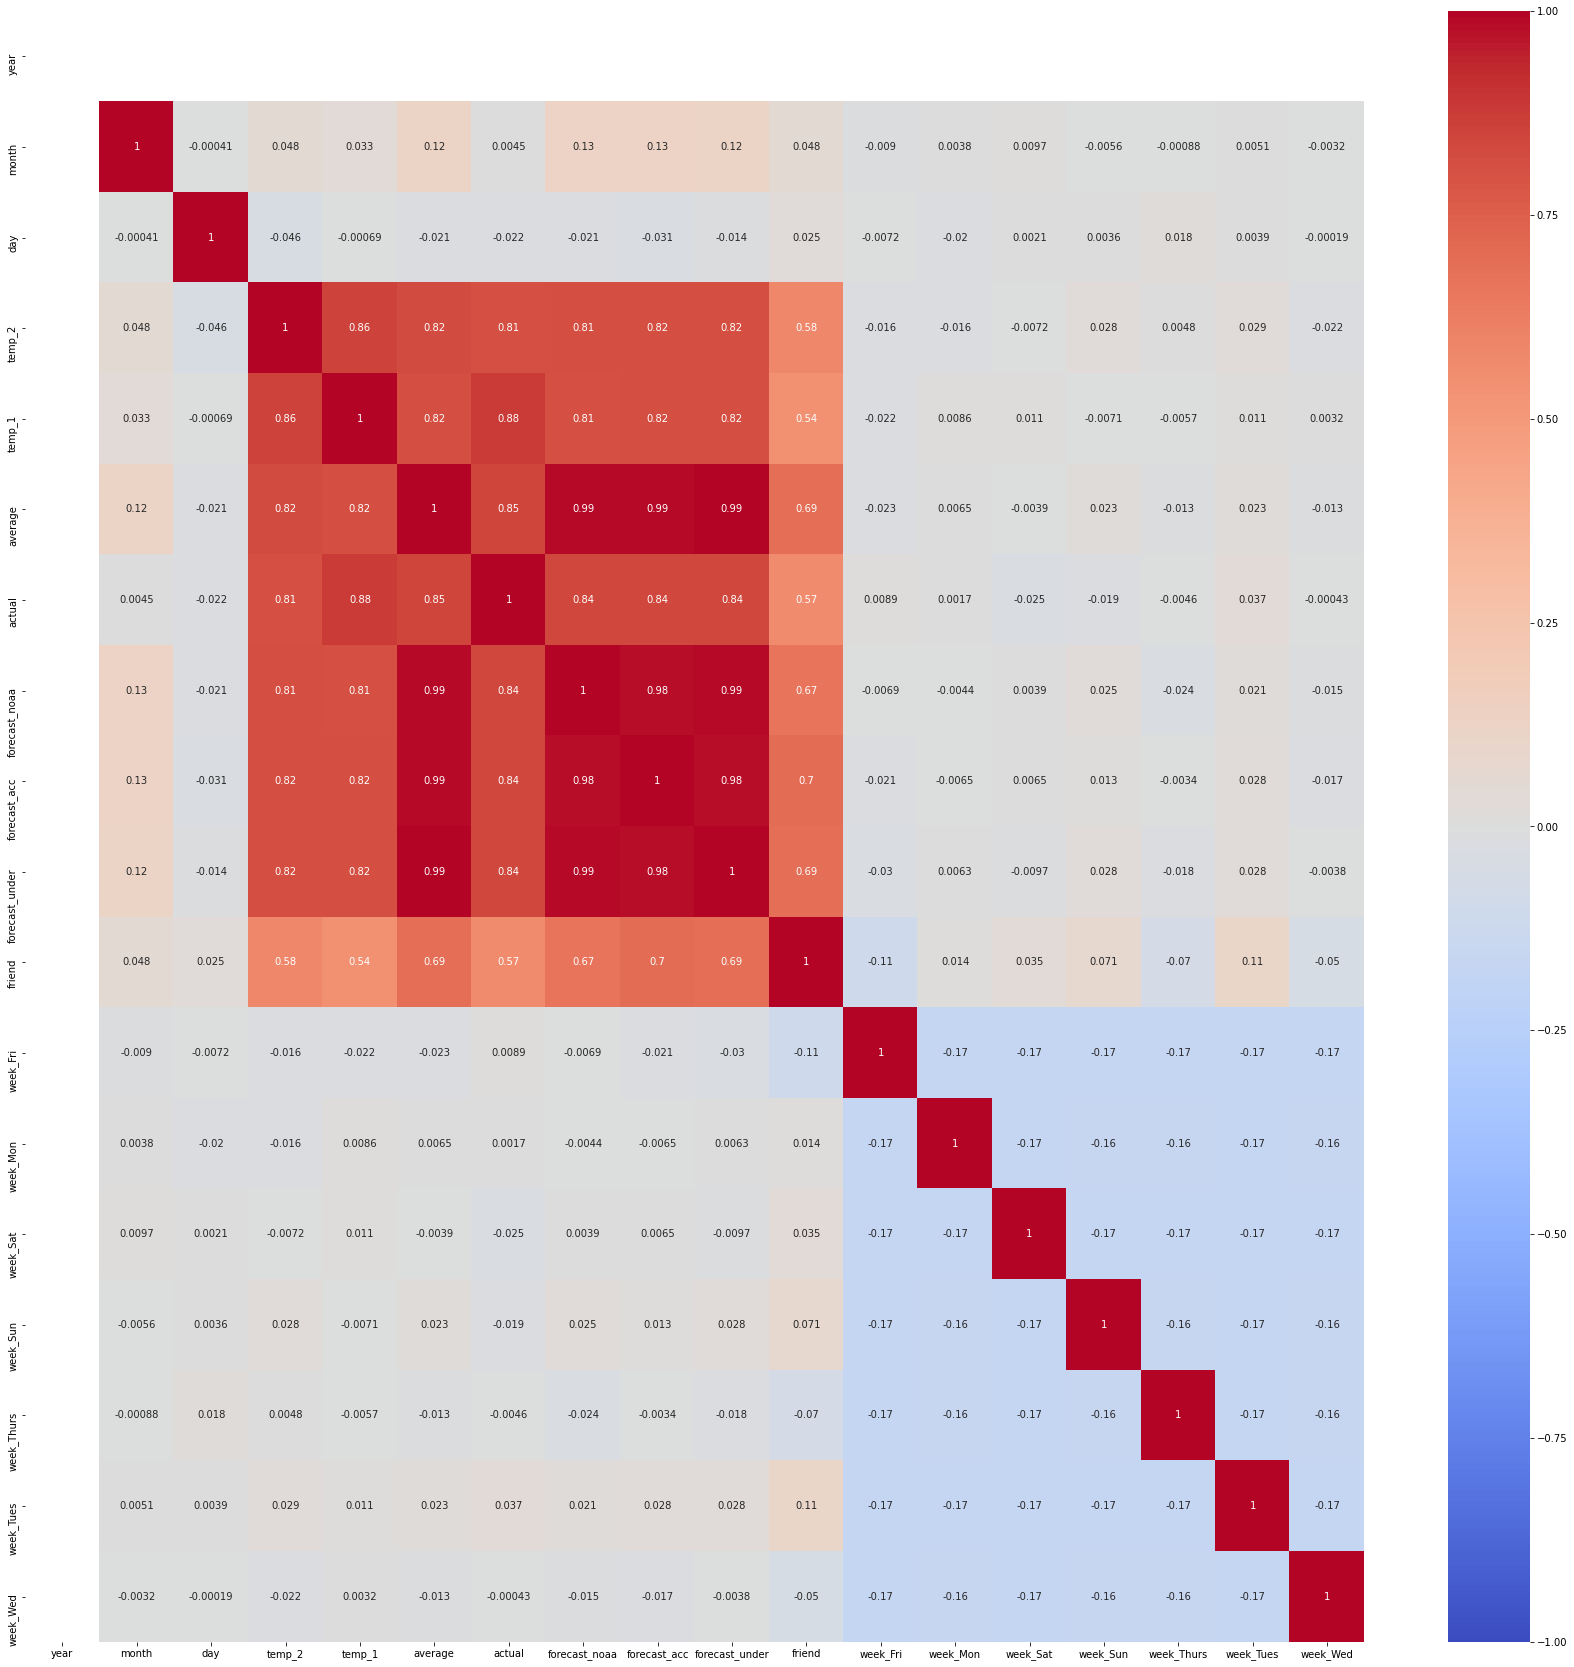

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotar a Correlação das variaveis
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(df.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap="coolwarm", ax=ax)

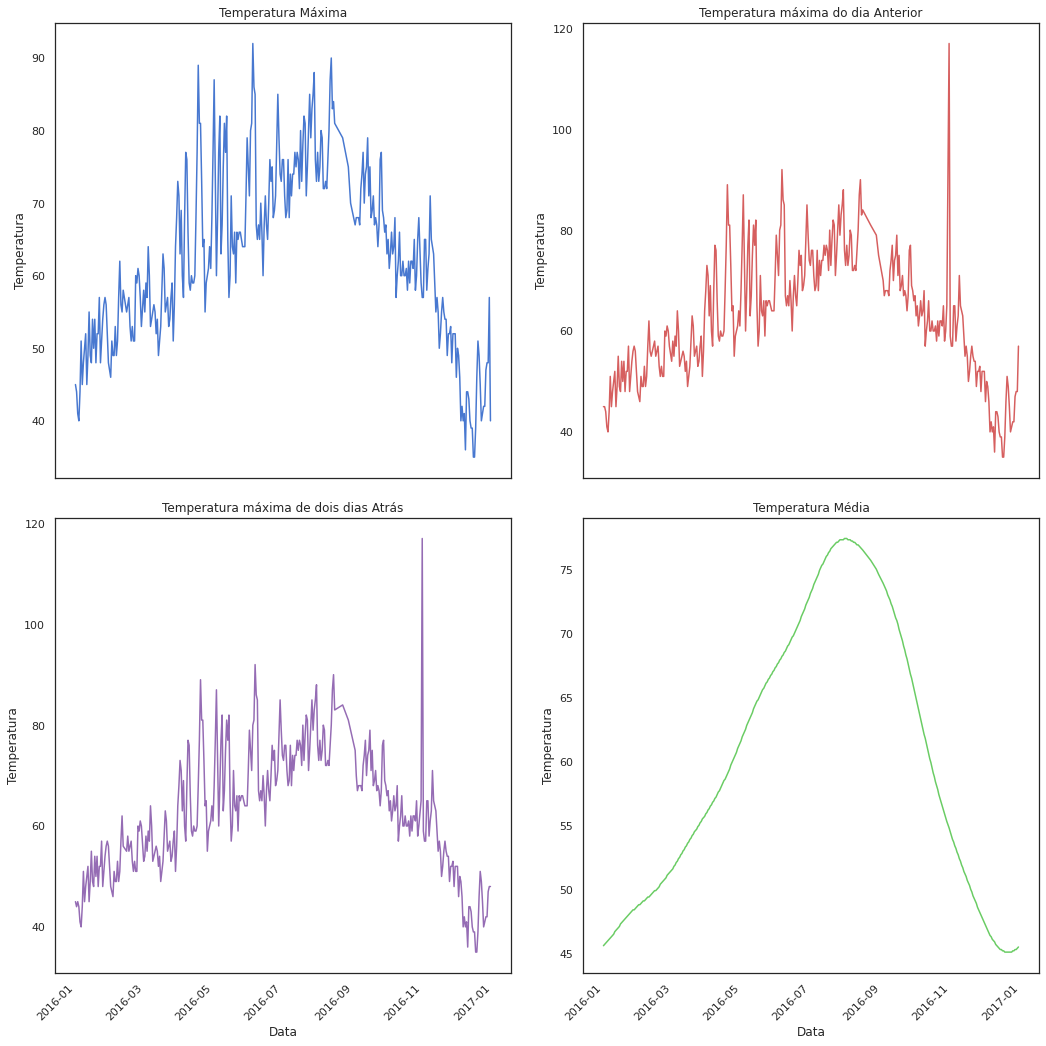

In [6]:
from datetime import datetime

# Preparando as nossas datas para plotar

dataStr = [str(int(year))+"/"+str(int(month))+"/"+ str(int(day)) for year, month, day in zip(df['year'],df['month'],df['day'])]

datas = []

for data in dataStr:
    dataFormat = datetime.strptime(data,"%Y/%m/%d")
    datas.append(dataFormat)    
    
# Plotando a temperatura máxima, a temp máxima do dia anterior, de dois dias anteriores e a média
sns.set(style="white", palette="muted", color_codes=True)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,15))
fig.autofmt_xdate(rotation = 45)

sns.lineplot(x=datas, y=df['actual'],ax=ax1, color="b")
ax1.set_xlabel(''); ax1.set_ylabel('Temperatura'); ax1.set_title('Temperatura Máxima')

# Temperature from 1 day ago
sns.lineplot(x=datas, y=df['temp_1'],ax=ax2, color="r")
ax2.set_xlabel(''); ax2.set_ylabel('Temperatura'); ax2.set_title('Temperatura máxima do dia Anterior')

# Temperature from 2 days ago
sns.lineplot(x=datas, y=df['temp_2'],ax=ax3, color="m")
ax3.set_xlabel('Data'); ax3.set_ylabel('Temperatura'); ax3.set_title('Temperatura máxima de dois dias Atrás')

# Avg Estimate
sns.lineplot(x=datas, y=df['average'],ax=ax4, color="g")
ax4.set_xlabel('Data'); ax4.set_ylabel('Temperatura'); ax4.set_title('Temperatura Média')

plt.tight_layout(pad=2)

In [7]:
# Dividindo em X e Y
X = df.drop("actual", axis=1)
y = df["actual"]

X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

print(X_train.info())
print(X_test.info())
print(y_train.describe())
print(y_test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            243 non-null    int64  
 1   month           243 non-null    int64  
 2   day             243 non-null    int64  
 3   temp_2          243 non-null    int64  
 4   temp_1          243 non-null    int64  
 5   average         243 non-null    float64
 6   forecast_noaa   243 non-null    int64  
 7   forecast_acc    243 non-null    int64  
 8   forecast_under  243 non-null    int64  
 9   friend          243 non-null    int64  
 10  week_Fri        243 non-null    uint8  
 11  week_Mon        243 non-null    uint8  
 12  week_Sat        243 non-null    uint8  
 13  week_Sun        243 non-null    uint8  
 14  week_Thurs      243 non-null    uint8  
 15  week_Tues       243 non-null    uint8  
 16  week_Wed        243 non-null    uint8  
dtypes: float64(1), int64(9), uint8(7)
m

In [8]:
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict, TimeSeriesSplit

model = tree.DecisionTreeRegressor()

tscv = TimeSeriesSplit(n_splits=20)

score = cross_val_score(model, X_train, y_train, cv=tscv, scoring="neg_root_mean_squared_error")

score.mean()

-7.97452178611416

-6.096614455818396
Melhor combinação de algoritmos: mse e 3 Média: -6.096614455818396


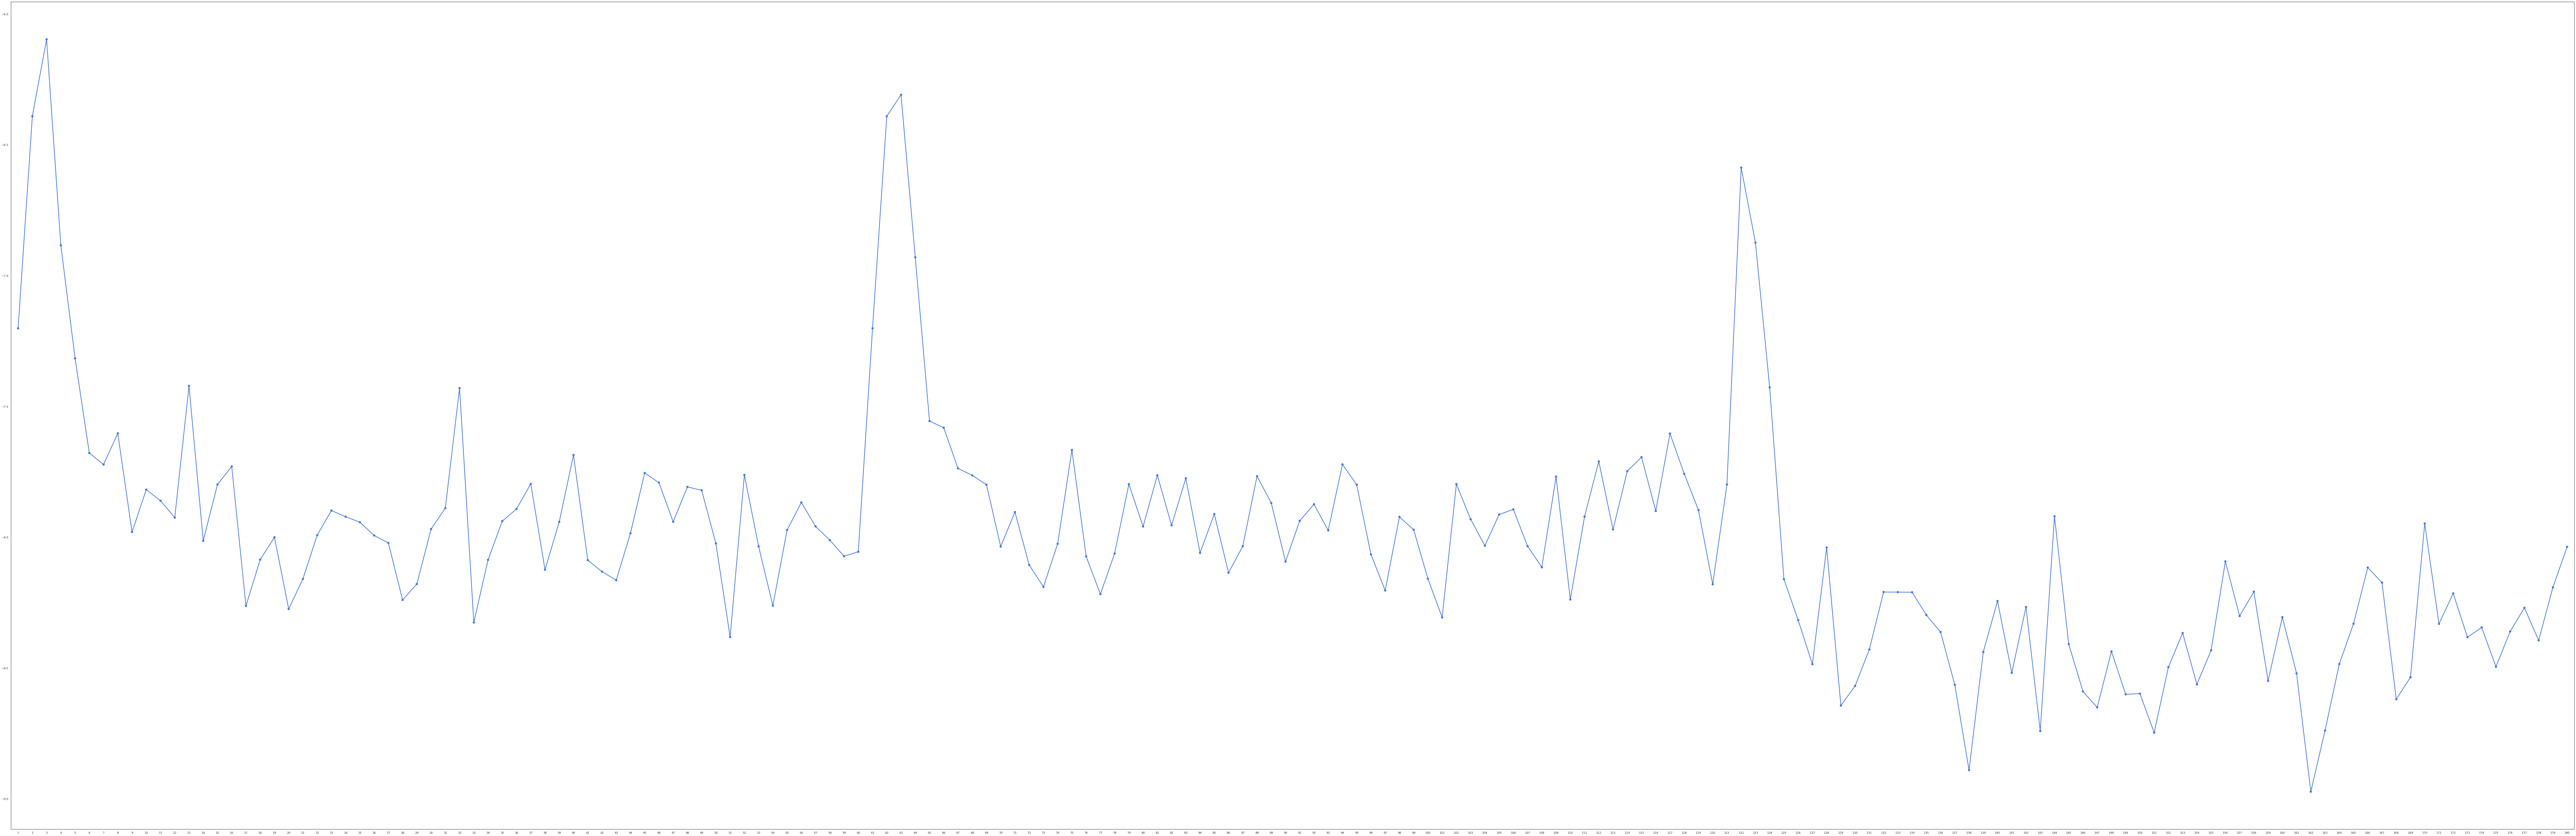

In [9]:
crit = ["mse","friedman_mse","mae"]

scores = {}
listaVal = []

for i in crit:
    scores[i] = {}

for c in crit:
    for i in range(1,61):
        model = tree.DecisionTreeRegressor(criterion = c, max_depth=i)
        score = cross_val_score(model, X_train, y_train, cv=tscv, scoring="neg_root_mean_squared_error")
        scores[c][i] = score.mean()
        listaVal.append(score.mean())
        
maximo = max(listaVal)
print(maximo)

for criter in scores.items():
    for depth in criter[1].items():
        if maximo in depth:
           combination = (criter[0], depth[0])
           break 

print("Melhor combinação de algoritmos: " + combination[0] + " e " + str(combination[1]) + " Média: " + str(maximo))

fig, ax = plt.subplots(figsize=(181,60))
sns.pointplot(x=np.arange(1,181), y=listaVal, ax=ax)

In [10]:
from sklearn import tree

model = tree.DecisionTreeRegressor(criterion = "mse", max_depth=3)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

predictions

array([71.32075472, 71.32075472, 71.32075472, 71.32075472, 71.32075472,
       71.32075472, 71.32075472, 64.70588235, 71.32075472, 71.32075472,
       77.97368421, 71.32075472, 71.32075472, 64.70588235, 71.32075472,
       64.70588235, 59.75      , 64.70588235, 59.75      , 64.70588235,
       64.70588235, 64.70588235, 71.32075472, 64.70588235, 64.70588235,
       59.75      , 64.70588235, 64.70588235, 59.75      , 59.75      ,
       64.70588235, 59.75      , 59.75      , 59.75      , 59.75      ,
       59.75      , 64.70588235, 64.70588235, 64.70588235, 59.75      ,
       59.75      , 59.75      , 55.95744681, 84.14285714, 55.95744681,
       55.95744681, 55.95744681, 55.95744681, 55.95744681, 55.95744681,
       55.95744681, 55.95744681, 71.32075472, 55.95744681, 55.95744681,
       55.95744681, 55.95744681, 55.95744681, 55.95744681, 55.95744681,
       55.95744681, 55.95744681, 55.95744681, 55.95744681, 55.95744681,
       55.95744681, 49.73684211, 49.73684211, 49.73684211, 49.73

In [11]:
from sklearn.metrics import mean_squared_error
import math

model = tree.DecisionTreeRegressor(criterion = "mse", max_depth=3)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

score = math.sqrt(mean_squared_error(y_test,predictions))

score

6.457558923832363

[Text(167.4, 190.26, 'X[4] <= 66.5\nmse = 128.341\nsamples = 243\nvalue = 65.412'),
 Text(83.7, 135.9, 'X[5] <= 55.55\nmse = 46.628\nsamples = 127\nvalue = 56.677'),
 Text(41.85, 81.53999999999999, 'X[5] <= 49.25\nmse = 23.698\nsamples = 85\nvalue = 53.176'),
 Text(20.925, 27.180000000000007, 'mse = 17.036\nsamples = 38\nvalue = 49.737'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 11.785\nsamples = 47\nvalue = 55.957'),
 Text(125.55000000000001, 81.53999999999999, 'X[9] <= 54.0\nmse = 18.039\nsamples = 42\nvalue = 63.762'),
 Text(104.625, 27.180000000000007, 'mse = 5.938\nsamples = 8\nvalue = 59.75'),
 Text(146.475, 27.180000000000007, 'mse = 16.208\nsamples = 34\nvalue = 64.706'),
 Text(251.10000000000002, 135.9, 'X[4] <= 76.5\nmse = 42.836\nsamples = 116\nvalue = 74.974'),
 Text(209.25, 81.53999999999999, 'X[5] <= 75.0\nmse = 25.77\nsamples = 71\nvalue = 72.465'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 26.595\nsamples = 53\nvalue = 71.321'),
 Text(230.175, 27.

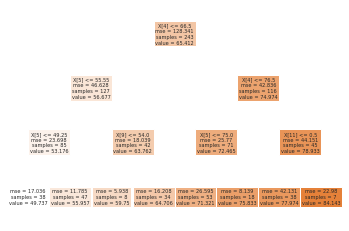

In [12]:
from sklearn import tree

model = tree.DecisionTreeRegressor(criterion = "mse", max_depth=3)

model.fit(X_train, y_train)

tree.plot_tree(model, filled=True)

<function matplotlib.pyplot.show(*args, **kw)>

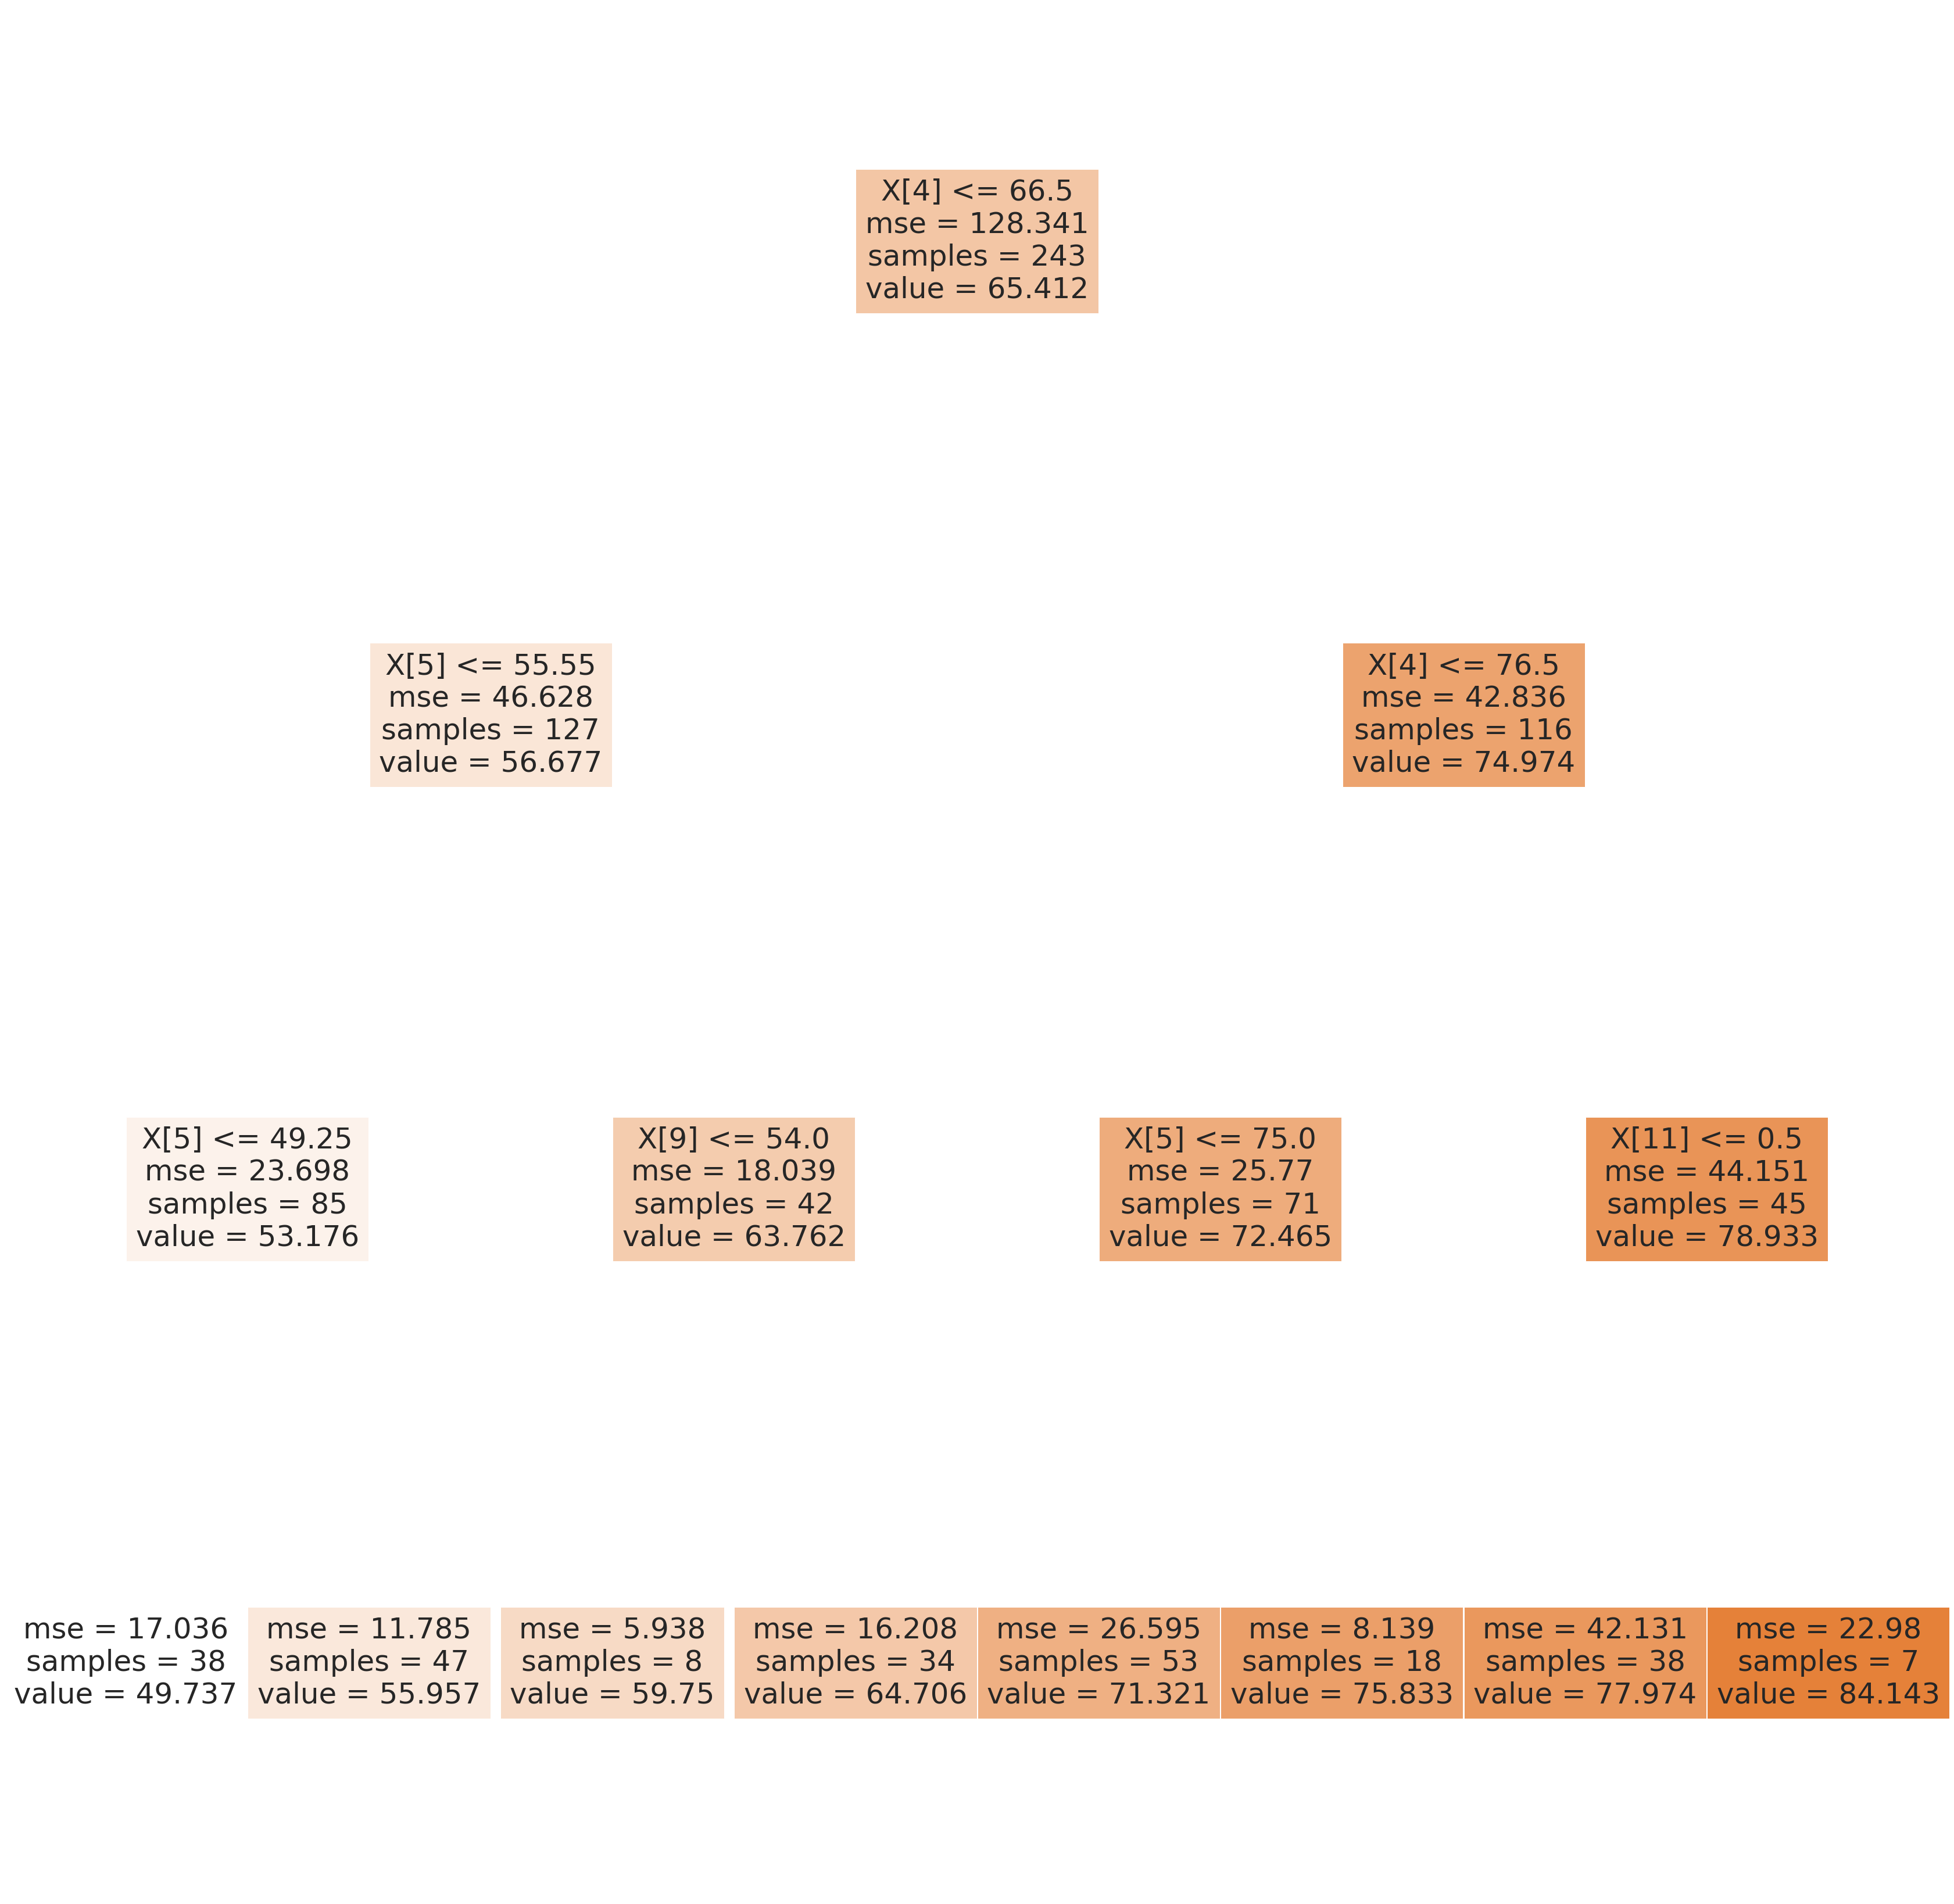

In [13]:
import matplotlib.pyplot as plt

model = tree.DecisionTreeRegressor(criterion = "mse", max_depth=3)

model.fit(X_train, y_train)

plt.figure(figsize=(60,60))

tree.plot_tree(model, filled=True)

plt.show

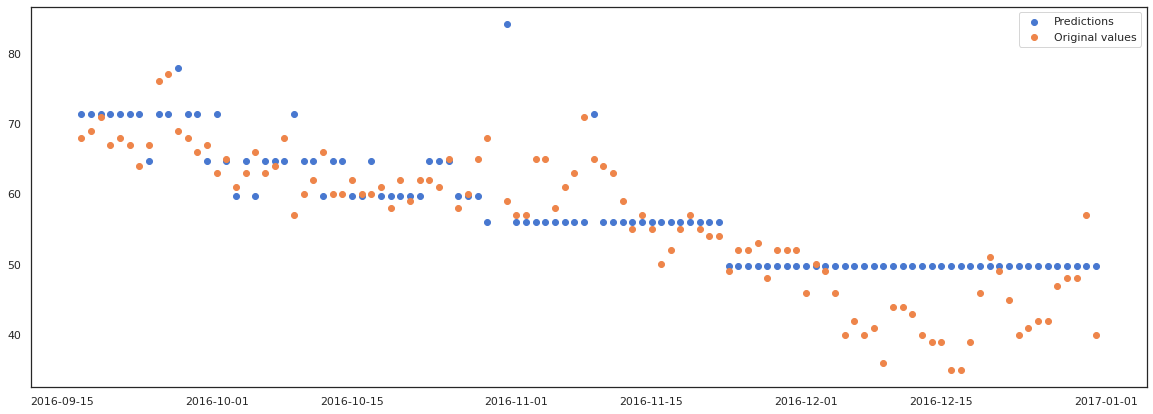

In [14]:
model = tree.DecisionTreeRegressor(criterion = "mse", max_depth=3)

model.fit(X_train, y_train)

predictions = model.predict(X_test)


# Preparando as nossas datas para plotar

dataStr = [str(int(year))+"/"+str(int(month))+"/"+ str(int(day)) for year, month, day in zip(X_test['year'],X_test['month'],X_test['day'])]

datas = []

for data in dataStr:
    dataFormat = datetime.strptime(data,"%Y/%m/%d")
    datas.append(dataFormat)  


# Dispersão de pred vs. y
plt.figure(figsize=(20, 7))

plt.scatter(datas, predictions , label= "Predictions")
plt.scatter(datas, y_test, label="Original values")
plt.legend()

-5.642500080093154
Melhor min_samples_split: 2 Melhor min_samples_leaf: 6 Média: -5.642500080093154


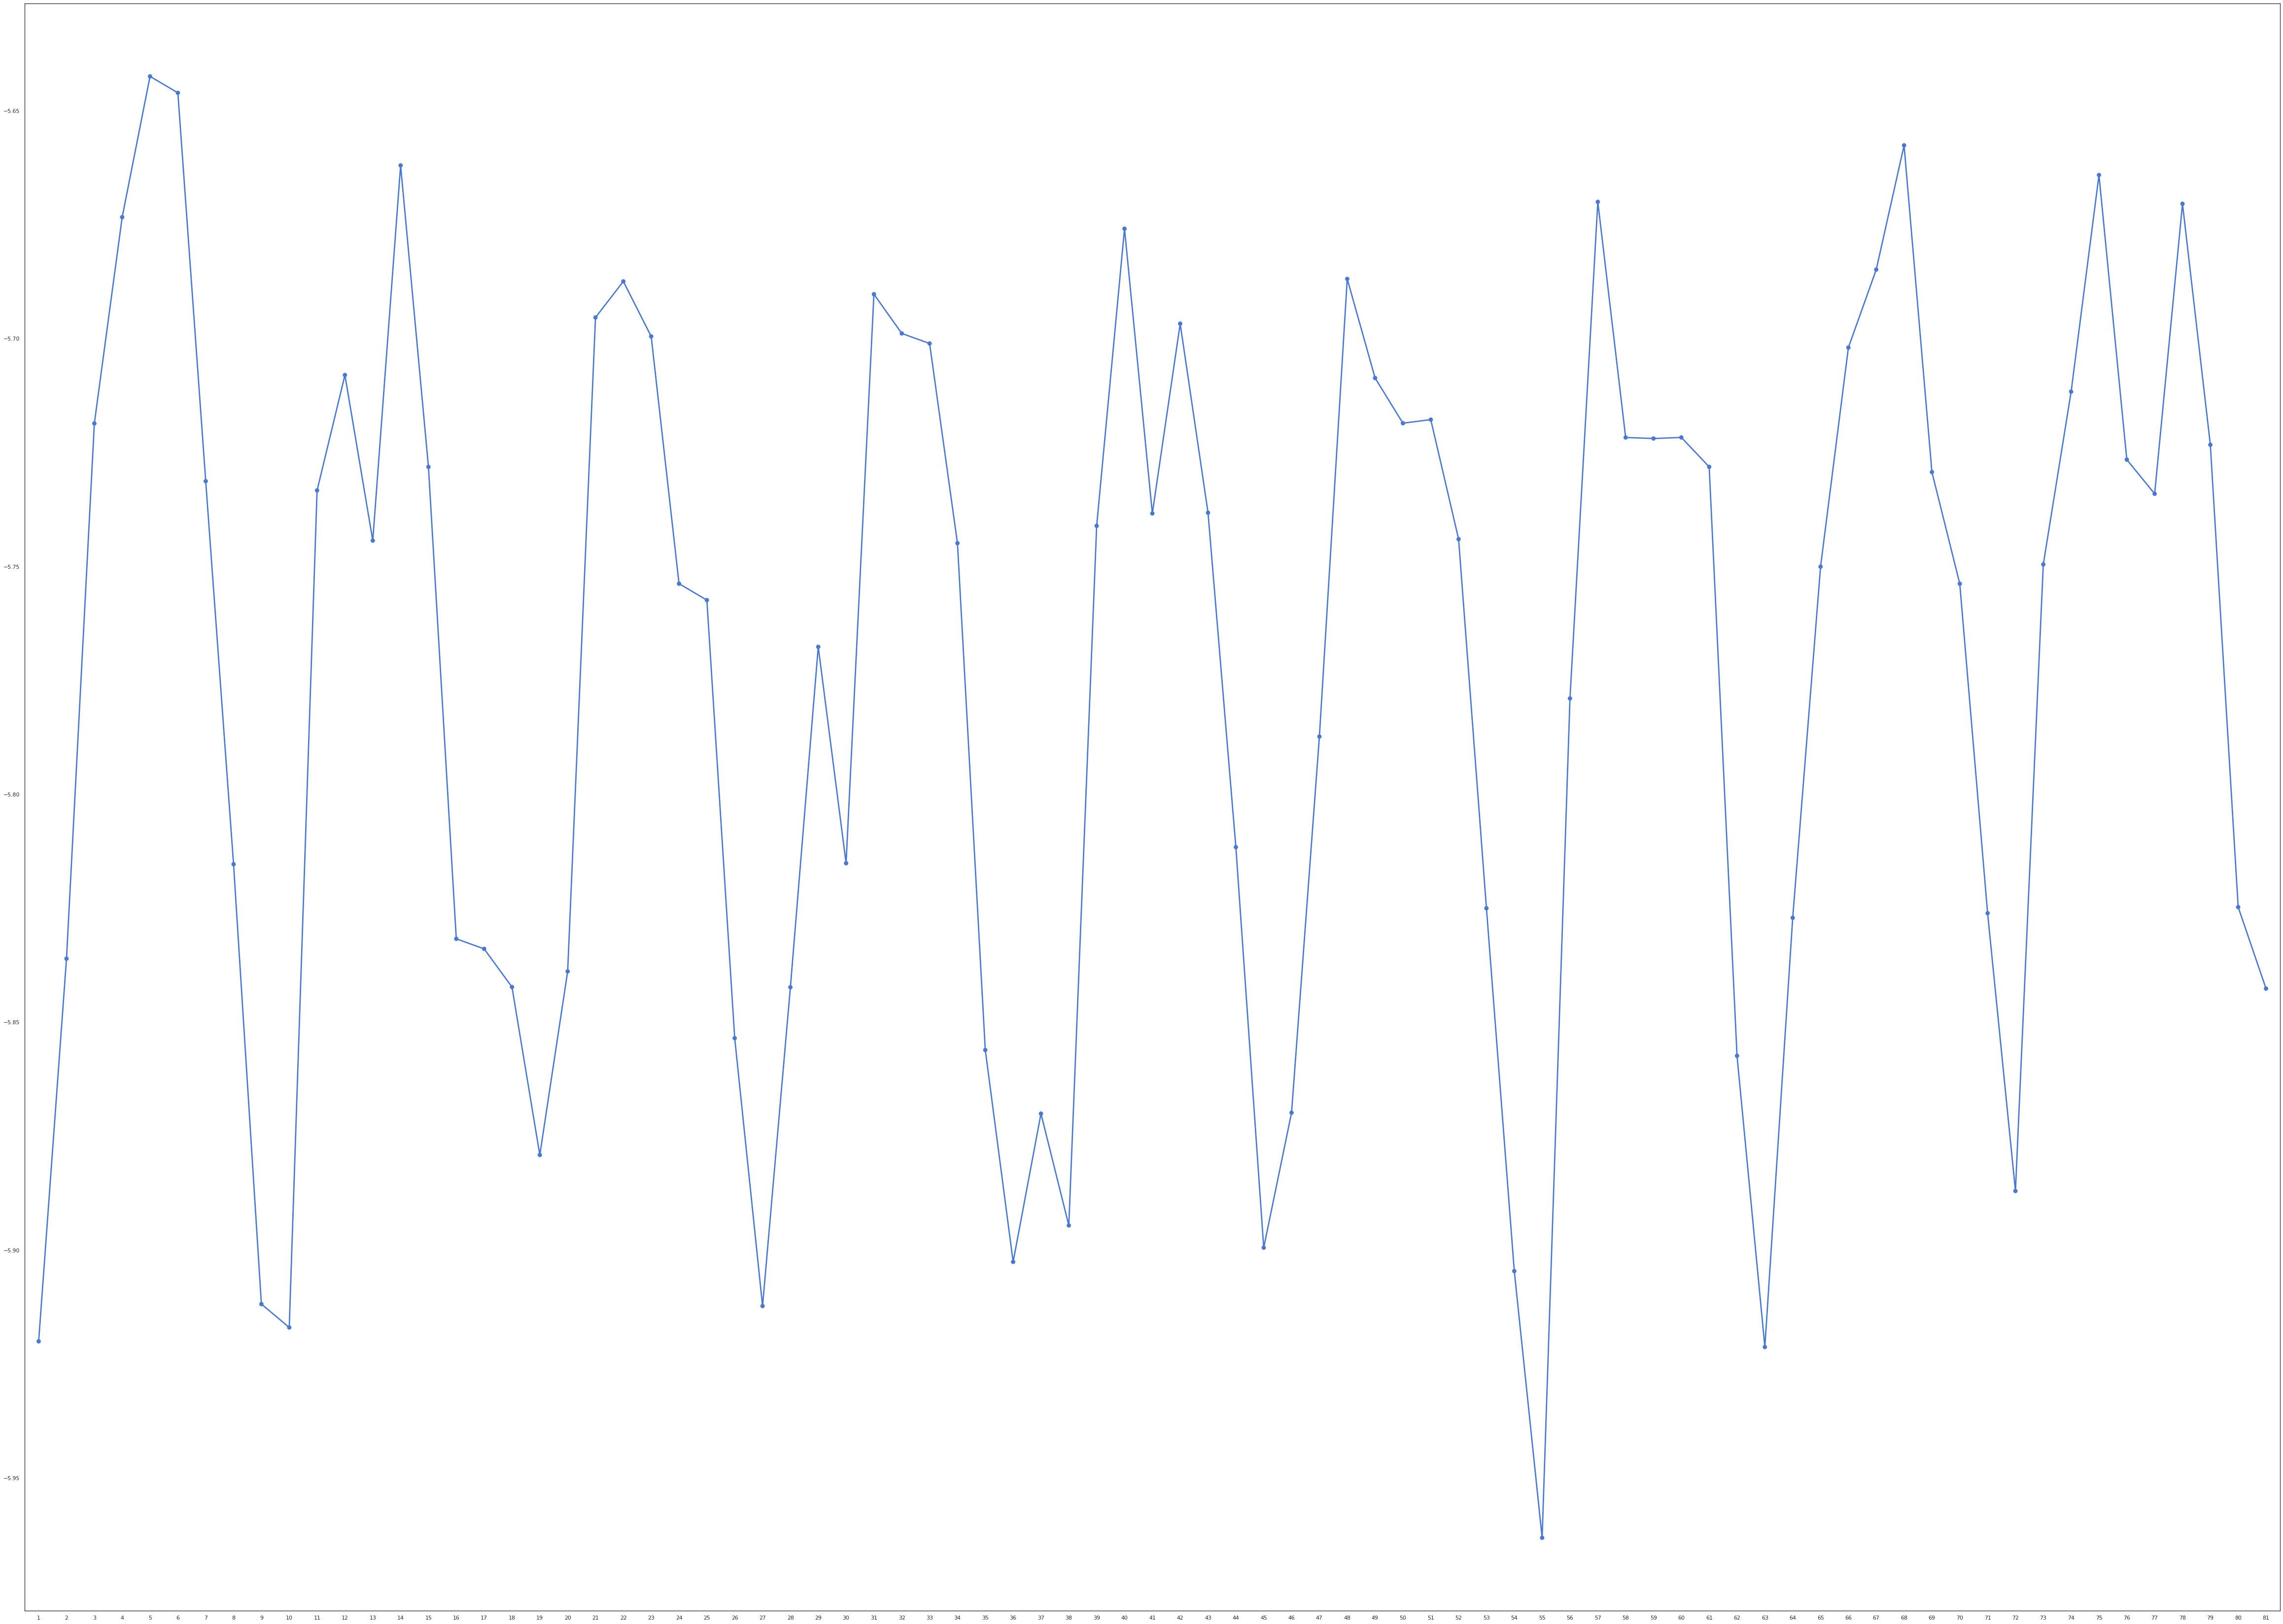

In [46]:
from sklearn import ensemble

listaVal2 = []
listaKeys = []

tscv = TimeSeriesSplit(n_splits=20)

for i in range(2,11):
    for j in range(2, 11):
        model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split = i, min_samples_leaf = j)
        score = cross_val_score(model, X_train, y_train, cv=tscv, scoring="neg_root_mean_squared_error")
        listaVal2.append(score.mean())
        listaKeys.append((i,j))
        
        
maximo2 = max(listaVal2)

print(maximo2)

combin = listaKeys[listaVal2.index(maximo2)]

print("Melhor min_samples_split: " + str(combin[0]) + " Melhor min_samples_leaf: " + str(combin[1]) + " Média: " + str(maximo2))
fig, ax = plt.subplots(figsize=(82,60))
sns.pointplot(x=np.arange(1,82), y=listaVal2, ax=ax)

In [47]:
from sklearn.metrics import mean_squared_error
import math

model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split = 2, min_samples_leaf = 6)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

score = math.sqrt(mean_squared_error(y_test,predictions))

score

5.0459494220022325

RMSE one Tree: 6.457558923832363
RMSE Random Forrest: 5.072282255461306


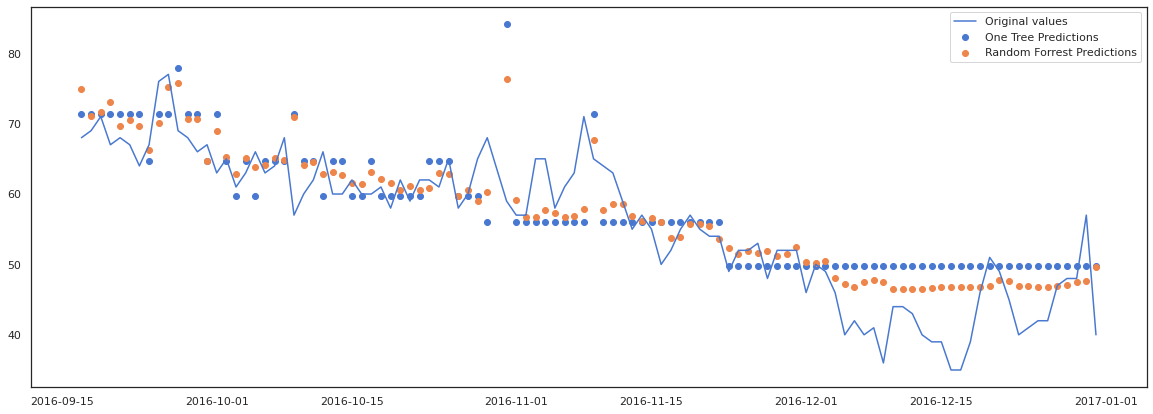

In [49]:
model = tree.DecisionTreeRegressor(criterion = "mse", max_depth=3)
model2 = ensemble.RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split = 2, min_samples_leaf = 6)

model.fit(X_train, y_train)

predictions = model.predict(X_test)


model2.fit(X_train, y_train)

predictions2 = model2.predict(X_test)

# Preparando as nossas datas para plotar

dataStr = [str(int(year))+"/"+str(int(month))+"/"+ str(int(day)) for year, month, day in zip(X_test['year'],X_test['month'],X_test['day'])]

datas = []

for data in dataStr:
    dataFormat = datetime.strptime(data,"%Y/%m/%d")
    datas.append(dataFormat)  

score = math.sqrt(mean_squared_error(y_test,predictions))
score2 = math.sqrt(mean_squared_error(y_test,predictions2))

print("RMSE one Tree: " + str(score))
print("RMSE Random Forrest: " + str(score2))

# Dispersão de pred vs. y
plt.figure(figsize=(20, 7))

plt.scatter(datas, predictions , label= "One Tree Predictions")
plt.plot(datas, y_test, label="Original values")
plt.scatter(datas, predictions2, label = "Random Forrest Predictions")
plt.legend()